In [19]:
import numpy as np
import os
from os.path import join, isdir
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib notebook

# Load and proprocess documents
**Load document labels**

In [2]:
segmented_path = u'./corpus/segmented-docs' # it will listdir into unicode
doc_labels = [fn for fn in os.listdir(segmented_path) if isdir(join(segmented_path, fn))] # list only folders
doc_labels_idx = {}
for i, label in enumerate(doc_labels):
    print i, label
    doc_labels_idx[label] = i

0 ประมง
1 มนุษยศาสตร์
2 วนศาสตร์
3 วิทยาศาสตร์
4 วิทยาศาสตร์การกีฬา
5 วิศวกรรมศาสตร์ กำแพงแสน
6 ศึกษาศาสตร์
7 สังคมศาสตร์
8 สัตวแพทยศาสตร์
9 สิ่งแวดล้อม
10 อุตสาหกรรมเกษตร
11 เกษตร
12 เกษตร กำแพงแสน
13 เศรษฐศาสตร์
14 โครงการสหวิทยาการระดับบัณฑิตศึกษา


** Load dataset **

In [12]:
%%time
dataset_contents, dataset_labels = [], []
for i, label in enumerate(doc_labels):
    curr_dir = join(segmented_path, label)
    fns = os.listdir(curr_dir)
    for fn in fns:
        file_path = join(curr_dir, fn)
        with open(file_path, 'r') as f:
            content = unicode(f.read(), 'utf8')
            dataset_contents.append(content)
            dataset_labels.append(i)
N = len(dataset_contents)
print 'Total Segmented Documents:', N

Total Segmented Documents: 46
Wall time: 186 ms


** Define a function that trims words and replace all PIPELINE by space **

In [4]:
def pretty_trim(text):
    words = text.split('|')
    stripped_words_generator = (word.strip() for word in words) # generates a stripped word when its next() method is called
    trimmed_words = [word for word in stripped_words_generator if word] # retains words that are not empty
    return ' '.join(trimmed_words)

**Show sample content**

In [5]:
print 'Content:', dataset_contents[1][:2**8], '...'
print 'Label:', dataset_labels[1]

Content: I|49620305|Ipage| |I|วิทยานิพนธ์|P|การศึกษา|คุณลักษณะ| |complementary| |dnas| |cdnas| |และ|การแสดงออก|ของ|ยีน| |antilipopolysaccharide| |factors| |ใน|กุ้งก้ามกราม| |macrobrachium| |rosenbergii| |de| |manPmolecular| |characterization| |of| |complementary| | ...
Label: 0


** Show sample content after pretty_trimmed **

In [6]:
print 'Content:', pretty_trim(dataset_contents[1][:2**8]), '...'
print 'Label Str:', doc_labels[dataset_labels[1]]

Content: I 49620305 Ipage I วิทยานิพนธ์ P การศึกษา คุณลักษณะ complementary dnas cdnas และ การแสดงออก ของ ยีน antilipopolysaccharide factors ใน กุ้งก้ามกราม macrobrachium rosenbergii de manPmolecular characterization of complementary ...
Label Str: ประมง


** Trim all documents **

In [7]:
%%time
dataset_contents_trimmed = [pretty_trim(content) for content in dataset_contents]

Wall time: 2.01 s


** Count number of words for each document **

In [26]:
dataset_words_count = np.array([len(content.split()) for content in dataset_contents_trimmed])
print 'Words Count Mean: ', np.mean(dataset_words_count)
dataset_words_count[:min(40,N)]

Words Count Mean:  111796.0


array([ 63538,  33434,  39696,  44267,  23139,  56824,  22140,  37269,
        33124,   9475,  17489,  17926,  20160,  15317,  19735,  19407,
        27150,  24979,  40441,  29729,  19635,  49713,  25763,  40361,
        22132,   3318, 534730,  52949,  23456,  21528,  59842,  16387,
        19244,  17862,  27011,  27991,  24493,  38236,  25501,  16911])

** Show words count histogram **

<IPython.core.display.Javascript object>


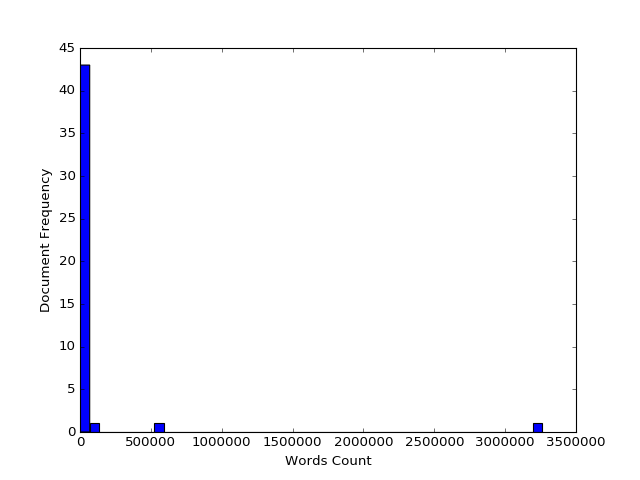

In [21]:
plt.figure()
plt.hist(dataset_words_count, bins=50)
plt.xlabel('Words Count')
plt.ylabel('Document Frequency')
plt.show()

# Machine Learning section

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Bag of Words Representation
Initialize a vectorizer that counts word instances and apply Tfidf (Term-Frequency Inverse-Document-Frequency) to them

In [32]:
%%time
tfidf = TfidfVectorizer(encoding=u'utf-8', stop_words='english', binary=False, max_features=None)
dataset_contents_vectorized = tfidf.fit_transform(dataset_contents_trimmed)

Wall time: 5.21 s


** Save extracted feature names to disk **

In [60]:
%%time
fn = 'feature_names.txt'
with open(fn, 'w') as f:
    f.write(u'\n'.join(feature_names).encode('utf8'))
print 'Check file %s to see all extracted feature names' % fn

Check file feature_names.txt to see all extracted feature names
Wall time: 18 ms


**Vectorized Dataset Statistics**

In [63]:
feature_names = tfidf.get_feature_names()
print 'Shape:', dataset_contents_vectorized.shape
print 'Sample content of type %s:' % type(dataset_contents_vectorized)
print dataset_contents_vectorized

Shape: (46, 69363)
Sample content of type <class 'scipy.sparse.csr.csr_matrix'>:
  (0, 61919)	0.000677282629627
  (0, 60425)	0.000677282629627
  (0, 27629)	0.000677282629627
  (0, 49519)	0.000564351068981
  (0, 49525)	0.000611221901501
  (0, 36740)	0.000451419508334
  (0, 57780)	0.000432229612728
  (0, 61916)	0.000677282629627
  (0, 30067)	0.00135456525925
  (0, 44236)	0.000677282629627
  (0, 31110)	0.000677282629627
  (0, 57401)	0.000611221901501
  (0, 51214)	0.000527995226809
  (0, 29836)	0.000677282629627
  (0, 51266)	0.000677282629627
  (0, 50827)	0.000677282629627
  (0, 12998)	0.000259386197179
  (0, 47878)	0.000677282629627
  (0, 50292)	0.000677282629627
  (0, 36140)	0.000677282629627
  (0, 32206)	0.000564351068981
  (0, 36999)	0.000611221901501
  (0, 51423)	0.000677282629627
  (0, 61244)	0.000677282629627
  (0, 40519)	0.000677282629627
  :	:
  (45, 60662)	0.000927533053617
  (45, 42271)	0.000447755768552
  (45, 56619)	0.000904094728106
  (45, 56289)	0.000431004194189
  (45, 4590

## Dimensionality Reduction

Truncated SVD (Single Value Decomposition) is called Latent Semantic Analysis (LSA) in text analysis context

In [74]:
%%time
svd = TruncatedSVD(n_components=100) # works on sparse data
dataset_contents_reduced = svd.fit_transform(dataset_contents_vectorized)
print 'Shape:', dataset_contents_reduced.shape
print 'Explained Variance'

Shape: (46L, 46L)
Wall time: 2.59 s


## Training models

**Show training score **

In [125]:
%%time
models = [LogisticRegression(), RidgeClassifier(), LinearSVC(), DecisionTreeClassifier(),
          SGDClassifier(), KNeighborsClassifier(), Perceptron(), RandomForestClassifier()]
for clf in models:
    print 'Training', type(clf).__name__
    %time clf.fit(dataset_contents_vectorized, dataset_labels)
    print 'Score:', clf.score(dataset_contents_vectorized, dataset_labels)

Training LogisticRegression
Wall time: 610 ms
Score: 0.717391304348
Training RidgeClassifier
Wall time: 1.31 s
Score: 1.0
Training LinearSVC
Wall time: 275 ms
Score: 1.0
Training DecisionTreeClassifier
Wall time: 354 ms
Score: 1.0
Training SGDClassifier
Wall time: 56 ms
Score: 1.0
Training KNeighborsClassifier
Wall time: 1e+03 µs
Score: 0.45652173913
Training Perceptron
Wall time: 52 ms
Score: 1.0
Training RandomForestClassifier
Wall time: 76 ms
Score: 1.0
Wall time: 2.86 s
